<a href="https://colab.research.google.com/github/nabisgithub/machine_learning/blob/main/%5B%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0%5D_Ch3_230419.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to 회귀 알고리즘과 모델 규제

지도 학습 알고리즘


1.   분류 : 샘플을 몇 개의 클래스 중 하나로 분류하는 문제
2.   회귀 : 임의의 어떤 숫자를 예측하는 문제



# Ch3-1 최근접 이웃 회귀

## Step 1. 데이터 준비하기

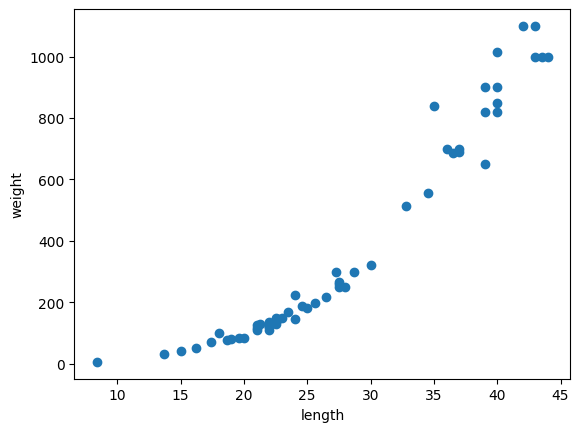

In [3]:
#넘파이 라이브러리 임포트
import numpy as np

#넘파이 배열로 데이터 준비하겠습니다. np.array가 그것입니다.
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

#맷플롯립 라이브러리 임포트하였습니다.
import matplotlib.pyplot as plt

#perch의 length(x축) 와 weight(y축) 의 산점도를 그려보겠습니다.
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
# 사이킷런의 train_test_split 함수만 임포트하였습니다.
from sklearn.model_selection import train_test_split

# perch_length를 train_input과 test_input으로, perch_weight를 train_target과 test_target으로 훈련/테스트 데이터로 분리합니다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

# 분리된 훈련용 데이터와 테스트 데이터의 샘플수와 차원수를 출력합니다.
print(train_input.shape, test_input.shape)

(42,) (14,)


사이킷런에 사용할 훈련 세트는 2차원 배열이어야 했습니다.

하지만 perch_length의 데이터는 1차원 배열이기 때문에 2차원 배열로 변환해줘야 합니다.

즉 (42,)로 표현되어있는 데이터를 (42,1)로 바꿔주어야 한다는 의미입니다.

### reshpae()함수

데이터의 형태를 변환하는 함수는 reshape() 함수를 사용하면 됩니다.

- 주의 : 해당 함수는 크기가 바뀐 새로운 배열을 반환할 때 지정한 크기가 원본 배열에 있는 원소의 개수와 다르면 에러가 발생합니다.

- 자동으로 배열의 크기를 지정하는 기능 ; 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미입니다. (배열의 전체 원소 개수를 외우지 않아도 되므로 편리합니다.)


In [6]:
# 훈련용 데이터와 테스트 데이터를 2차원 배열로 변형하겠습니다.
# 첫 번째 크기를 나머지 원소 개수로 채우고 두 번째 크기를 1로 변형하겠습니다.

train_input = train_input.reshape(-1, 1)
# train_input = train_input.reshape(42,1)과 같은 결과입니다.

test_input = test_input.reshape(-1, 1)
# test_input = test_input.reshape(14, 1)과 같은 결과입니다.

## Step 2. 모델 훈련하기

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)



0.992809406101064


### score : 결정계수($ R^2$)

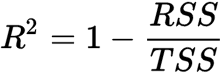

1- [{(타깃-예측)의 제곱합}/{(타깃-평균)의 제곱합}]

 0과 1사이의 값을 도출합니다.

 타깃의 평균 정도를 예측하는 수준이면 결정계수가 0에 가까워지고
 예측이 타깃에 아주 가까워지면 결정계수가 1에 가까워집니다.

In [9]:
print(knr.score(test_input, test_target))

0.992809406101064


### score : 평균 절댓값 오차

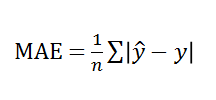

In [10]:
#사이킷런의 매트릭스에서 평균 절대값 오차 함수를 임포트합니다.
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


결과가 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있습니다.

### 과대적합 vs 과소적합

In [11]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


- 과대적합 : 훈련용 데이터 점수 > 테스트 데이터 점수
- 과소적합 : 훈련용 데이터 점수 < 테스트 데이터 점수

훈련용 데이터에서의 점수 < 테스트 데이터에서의 점수
이므로 과소적합이라고 할 수 있습니다.


즉 너무 적게 적합되어서 훈련용 데이터에서 더 낮은 점수를 나타내었습니다. 모델이 너무 단순해서 훈련 세트에서 적절히 훈련되지 않은 경우를 의미합니다.

반대로 과대적합이라면 너무 복잡하게 훈련해서 훈련용 세트에서만 잘 작동하는 모델이라는 의미입니다. 따라서 새로운 세트를 투입한다면 예측이 잘 동작하지 않을 것입니다.

과소적합을 해결하기 위해서, 
K-최근접 이웃 알고리즘이므로 k 이웃의 개수를 낮추는 방법을 이용하겠습니다.

이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것입니다.

여기서 이웃의 개수를 줄인다는 것은 10개를 한 번에 보다가 2개를 한 번에 보겠다는 의미와 같습니다. 10개가 이웃의 개수이면 하나의 다른 값이 있더라도 나머지 9개가 그 값을 보정해주기 때문에 그 튀는 값이 잘 보이지 않지만 2개가 이웃의 개수이면 다른 값이 있더라도 나머지 1개가 그 값을 상쇄해주기 어렵기 때문입니다.

In [13]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


 훈련용 점수와 테스트용 점수가 비슷해졌으므로
 
 과대적합, 과소적합 문제를 해결하였습니다.

## 확인문제

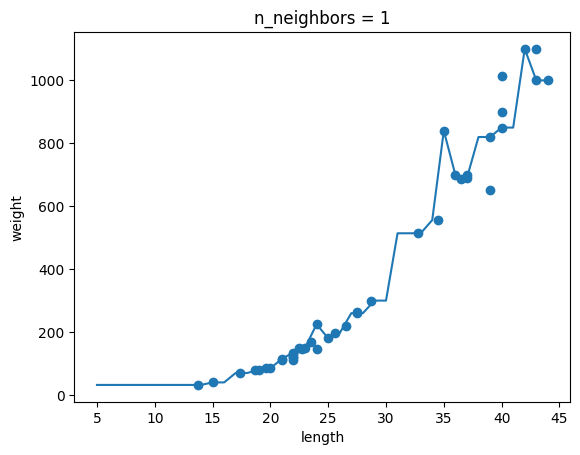

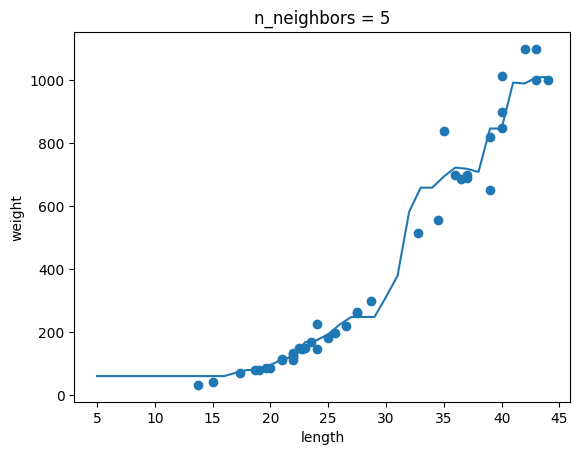

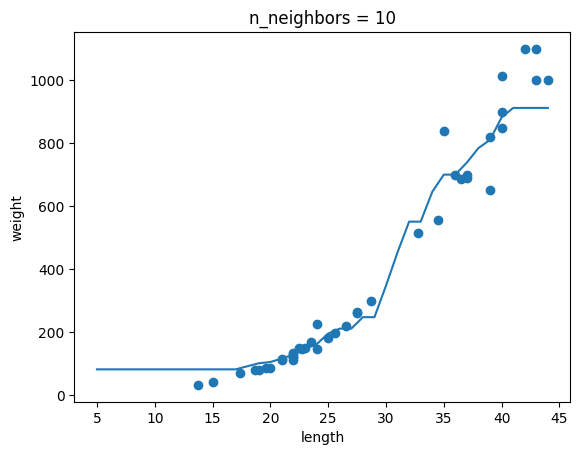

In [17]:
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

for n in [1, 5, 10] :
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'. format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

# Ch3-2 선형회귀

## Step 1. 데이터 준비하기

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

## Step 2. 선형 회귀 모델 훈련하기



[1241.83860323]
[39.01714496] -709.0186449535477


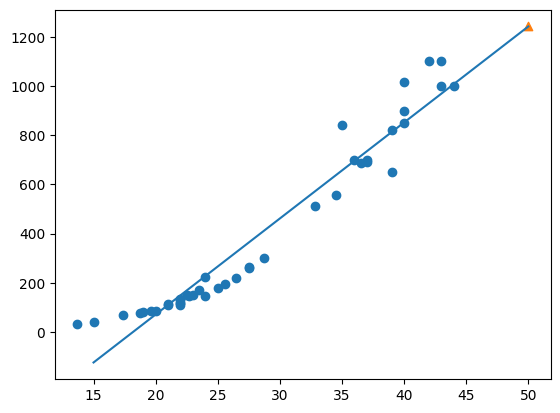

0.939846333997604
0.8247503123313558


In [18]:
#선형 회귀 모델을 훈련시키기 위해서 사이킷런의 선형회귀를 임포트합니다.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm의 농어의 무게를 예측합니다.
print(lr.predict([[50]]))
# [1241.83860323]

#선형회귀식(회귀계수와 절편)을 도출합니다.
print(lr.coef_, lr.intercept_)
[39.01714496] -709.0186449535477

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터를 삼각형으로 표시합니다.
plt.scatter(50, 1241.8, marker='^')
plt.show()

#과대 vs 과소 적합을 확인하기 위해서 train과 test의 점수를 비교합니다.
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
# 0.939846333997604
# 0.8247503123313558

방정식 그래프를 살펴보면,

15는 무게가 마이너스를 나타냅니다. 

하지만 현실에서는 있을 수 있는 일이 아닙니다.

## Step 3. 다항회귀 모델 훈련하기


그래프가 2차식의 그래프를 나타내므로,

무게 = a*길이$^2$ + b* 길이 + 절편

방정식으로 회귀 모델을 훈련해보고자 합니다.

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


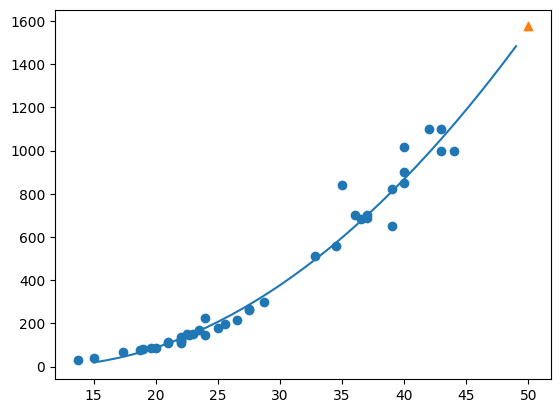

0.9706807451768623
0.9775935108325122


In [20]:
# train_input의 제곱과 train_input을 같이 배열을 붙입니다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

# 제곱한 poly 데이터를 선형회귀 모델로 훈련시킵니다.
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 50cm 농어의 예측값을 도출합니다.
print(lr.predict([[50**2, 50]]))
# [1573.98423528]

# 다항회귀계수와 절편을 도출합니다.
print(lr.coef_, lr.intercept_)
# [  1.01433211 -21.55792498] 116.0502107827827

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 넘파이의 슬라이스는 마지막 값을 포함하지 않기 때문에 15,50으로 설정합니다.

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

전체적으로 더 잘 적합하는 것을 알 수 있습니다.

다항회귀 점수도 전반적으로 더 높아졌고,

훈련용 점수와 테스트용 점수가 거의 비슷하므로

과대적합 및 과소적합 문제가 발생하지 않은 것으로 보입니다.

# Ch3-3 특성 공학과 규제